In [21]:
#card
"""Card class that represents a playing card and its image file name."""

class Card:
    FACES = ['Ace', '2', '3', '4', '5', '6',
             '7', '8', '9', '10', 'Jack', 'Queen','King']
    
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    
    
    def __init__(self, face, suit):
        """Initialize a card with a face and suit."""
        self._face = face 
        self._suit = suit
        
    @property 
    def face(self):
        """return the card's self._face value."""
        return self._face 
    
    @property 
    def suit(self):
        """Return the card's self._suit value."""
        return self._suit 
    
    @property 
    def image_name(self):
        """Return the card's image file name."""
        return str(self).replace(' ', '_') + '.png'
    
    def __repr__(self):
        """Return string representation of the repr()"""
        return f"Card(face='{self.face}', suit = '{self.suit}')"
    
    def __str__(self):
        """Return string representation for str()"""
        return f'{self.face} of {self.suit}'
    
    def __format__(self, format):
        """Return formatted string representation for str()"""
        return f'{str(self):{format}}'
    
    

In [22]:
#deck 
"""Deck class represents a deck of cards"""
import random 

class DeckOfCards:
    NUMBER_OF_CARDS = 52 # constant number of cards 
    
    def __init__(self):
        """Initialize the deck."""
        self._current_card = 0 
        self._deck = []
        
        for count in range(DeckOfCards.NUMBER_OF_CARDS):
            self._deck.append(Card(Card.FACES[count % 13], Card.SUITS[count // 13]))
            
    def shuffle(self):
        """Shuffle deck."""
        self._current_card = 0
        random.shuffle(self._deck)       
    
    def deal_card(self):
        """Return one card."""
        try:
            card = self._deck[self._current_card]
            self._current_card +=1
            return card 
        except:
            return None 
        
        
    def __str__(self):
        """Return a string representation of the current _deck."""
        s = ''
        for index, card in enumerate(self._deck):
            s += f'{self._deck[index]:<19}'
            if (index + 1) % 4 == 0:
                s += '\n'
        
        return s 
    
        

Ace of Hearts      2 of Hearts        3 of Hearts        4 of Hearts        
5 of Hearts        6 of Hearts        7 of Hearts        8 of Hearts        
9 of Hearts        10 of Hearts       Jack of Hearts     Queen of Hearts    
King of Hearts     Ace of Diamonds    2 of Diamonds      3 of Diamonds      
4 of Diamonds      5 of Diamonds      6 of Diamonds      7 of Diamonds      
8 of Diamonds      9 of Diamonds      10 of Diamonds     Jack of Diamonds   
Queen of Diamonds  King of Diamonds   Ace of Clubs       2 of Clubs         
3 of Clubs         4 of Clubs         5 of Clubs         6 of Clubs         
7 of Clubs         8 of Clubs         9 of Clubs         10 of Clubs        
Jack of Clubs      Queen of Clubs     King of Clubs      Ace of Spades      
2 of Spades        3 of Spades        4 of Spades        5 of Spades        
6 of Spades        7 of Spades        8 of Spades        9 of Spades        
10 of Spades       Jack of Spades     Queen of Spades    King of Spades     

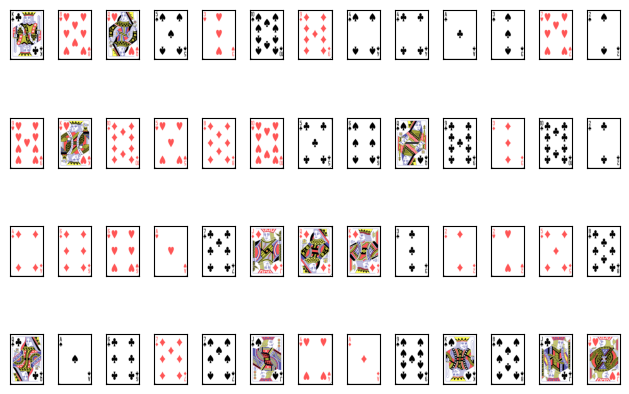

In [ ]:
from pathlib import Path 

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

path = Path('.').joinpath('card_images')
figure, axes_list = plt.subplots(nrows = 4, ncols = 13)

deck_of_cards = DeckOfCards()

deck_of_cards.shuffle()

for axes in axes_list.ravel():
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    image_name = deck_of_cards.deal_card().image_name
    img = mpimg.imread(str(path.joinpath(image_name).resolve()))
    axes.imshow(img)

figure.tight_layout()
plt.show()